# House Prices - Advanced Regression Techniques




The following are some of the terms used in the notebook:

train - Kaggle data on trains

test - Kaggle data for testing

X - train data independent variables (columns)

y - train data dependent variable (column)

data - a mix of training and testing data

X_ - train data with missing values removed

test_ - test data after missing values have been removed.

Xscaled is data that has been scaled from X.

x train 90, x test 10, y train 90, y test 10 - x train 90, x test 10, y train 90, y test 10 - y train 90, y test 10 - y train 90, y test 10 - y_

x train 75, x test 25, y train 75, y test 25 - data separated into train and test with testsize=0.25 from X

x train scaled 90, x test scaled 10, y train scaled 90, y test scaled 10 - train test split with test size=0.10 data from X scaled data.

x train scaled 75, x test scaled 25, y train scaled 75, y test scaled 25 - train test split with test size=0.25 data from X scaled data.

score test - stores the results of all algorithms applied to the x test and y test data.

model identifies which models/algorithms are being used.

best model - the best model's name

y predict test - data for submission

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #for visualisation

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-price/sample_submission.csv
/kaggle/input/house-price/data_description.txt
/kaggle/input/house-price/train.csv
/kaggle/input/house-price/test.csv


In [4]:
train=pd.read_csv('/kaggle/input/house-price/train.csv')
test=pd.read_csv('/kaggle/input/house-price/test.csv')

In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [6]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


## Starting prelimanary anaylsis

In [8]:
train.dtypes #shows datatype of different columns of train dataset

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [10]:
train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

from this we are getting gist about our dataset

### Finding the missing values and dealing with them

In [11]:
count=train.isnull()
count

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [12]:
#counting null value in both train and test dataset
train.isnull().sum().sum()

6965

In [13]:
test.isnull().sum().sum()

7000

***There are 6965 missing values in train dataset and 7000 values in test dataset***

## Splitting the dataset for training later

In [14]:
#Split the train into x_train and y_train so that SalePrice can be kept separate for training later
y = train.SalePrice
X = train.drop('SalePrice', axis=1)

In [15]:
y.shape ,X.shape, test.shape

((1460,), (1460, 80), (1459, 80))

In [16]:
X['Type'] = 'train'
test['Type'] = 'test'
data = X.append(test)

In [17]:
columns_with_null_values= data[data.columns[data.isnull().sum()>0]]
columns_with_null_values

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,WD
1455,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,1970.0,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN,WD
1456,RL,160.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,1960.0,Unf,2.0,576.0,TA,TA,NaN,NaN,NaN,WD
1457,RL,62.0,NaN,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,MnPrv,Shed,WD


***We have 34 columns which have null values out of 81 columns***

## Dealing with missing values

In [18]:
#We have to fill in appropriate value according to columns relevacny so our data don't get disturbed .
data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

##### In the above values, we can see that "Sbrkr" is the mostly used 'Electrical' part. Hence, we can't put "None" in the null values because a house must have "Electrical" items/fuses. So we will fill null values with "Sbrkr" in this column.

In [19]:
data['Electrical'].fillna("Sbrkr", inplace=True)

we have to fill in appropriate values according to columns specification

In [20]:
data['MSZoning'].value_counts()
#Filling null values with 'RL'
data['MSZoning'].fillna("RL",inplace=True)

#Filling nul values with mean
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)

data['Alley'].fillna("Nothing", inplace=True)
data['Utilities'].fillna("AllPub", inplace=True)
data['Exterior1st'].fillna("VinylSd", inplace=True)
data['Exterior2nd'].fillna("VinylSd", inplace=True)
data['MasVnrArea'].fillna(0, inplace=True)
data['MasVnrType'].fillna("None", inplace=True)
data['BsmtCond'].fillna("No", inplace=True)
data['BsmtExposure'].fillna("NB", inplace=True)
data['BsmtFinType1'].fillna("NB", inplace=True)
data['BsmtFinSF1'].fillna(0.0, inplace=True)
data['BsmtFinSF2'].fillna(0.0, inplace=True)
data['BsmtUnfSF'].fillna(0.0, inplace=True)
data['TotalBsmtSF'].fillna(0.0, inplace=True)
data['BsmtFullBath'].fillna(0.0, inplace=True)
data['BsmtHalfBath'].fillna(0.0, inplace=True)
data['KitchenQual'].fillna("TA", inplace=True)
data['Functional'].fillna("Typ", inplace=True)
data['FireplaceQu'].fillna("None", inplace=True)
data['GarageType'].fillna("No", inplace=True)
data['GarageYrBlt'].fillna(0, inplace=True)
data['GarageFinish'].fillna("No", inplace=True)
data['GarageCars'].fillna(0, inplace=True)
data['GarageArea'].fillna(0, inplace=True)
data['GarageQual'].fillna("No", inplace=True)
data['GarageCond'].fillna("No", inplace=True)
data['PoolQC'].fillna("No", inplace=True)
data['Fence'].fillna("No", inplace=True)
data['MiscFeature'].fillna("No", inplace=True)
data['SaleType'].fillna("Con", inplace=True)
data['SaleCondition'].fillna("None", inplace=True)
data['BsmtQual'].fillna("TA", inplace=True)
data['BsmtFinType2'].fillna("Unf", inplace=True)

### checking for null values

In [21]:
data.isnull().sum().sum()

0

### Checking different datatype of columns

In [22]:
data_Num=data.select_dtypes(np.number)

print('Numerical features :')
print(data_Num.columns,'\n')


Numerical features :
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object') 



In [23]:

data_Cat=data.select_dtypes(object)

print('Categorical features :')
print(data_Cat.columns)

Categorical features :
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Type'],
      dtype='object')


In [24]:
data_float=data.select_dtypes(np.float)

print('decimal point value features :')
print(data_float.columns,'\n')


decimal point value features :
Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object') 



## Data Preprocessing

In [25]:
data.var()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Id               7.102900e+05
MSSubClass       1.807749e+03
LotFrontage      4.542161e+02
LotArea          6.220471e+07
OverallQual      1.987951e+00
OverallCond      1.239060e+00
YearBuilt        9.175714e+02
YearRemodAdd     4.365736e+02
MasVnrArea       3.198896e+04
BsmtFinSF1       2.075768e+05
BsmtFinSF2       2.862157e+04
BsmtUnfSF        1.932401e+05
TotalBsmtSF      1.945873e+05
1stFlrSF         1.539480e+05
2ndFlrSF         1.837849e+05
LowQualFinSF     2.152665e+03
GrLivArea        2.560877e+05
BsmtFullBath     2.752853e-01
BsmtHalfBath     6.032327e-02
FullBath         3.057750e-01
HalfBath         2.528798e-01
BedroomAbvGr     6.768239e-01
KitchenAbvGr     4.599395e-02
TotRmsAbvGrd     2.462951e+00
Fireplaces       4.174831e-01
GarageYrBlt      2.022178e+05
GarageCars       5.809420e-01
GarageArea       4.645563e+04
WoodDeckSF       1.600898e+04
OpenPorchSF      4.566447e+03
EnclosedPorch    4.127323e+03
3SsnPorch        6.344439e+02
ScreenPorch      3.156683e+03
PoolArea  

In [26]:
corr =data.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.008931,-0.025235,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.026737,-0.017203,...,-0.009851,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050
MSSubClass,0.008931,1.000000,-0.390118,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.006309,-0.064002,...,-0.103534,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028
LotFrontage,-0.025235,-0.390118,1.000000,0.364382,0.204190,-0.068350,0.116905,0.085608,0.201090,0.203107,...,0.339380,0.106380,0.152160,0.010541,0.025255,0.069348,0.160857,0.035762,0.010337,-0.007265
LotArea,-0.040746,-0.201730,0.364382,1.000000,0.100541,-0.035617,0.024128,0.021612,0.124728,0.194168,...,0.213180,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234
OverallQual,-0.029771,0.033638,0.204190,0.100541,1.000000,-0.093847,0.597554,0.571532,0.426528,0.282150,...,0.565179,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614
OverallCond,-0.002839,-0.065625,-0.068350,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.133118,-0.050823,...,-0.154312,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102
YearBuilt,-0.016581,0.034409,0.116905,0.024128,0.597554,-0.368477,1.000000,0.612235,0.307520,0.279780,...,0.481328,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344
YearRemodAdd,-0.050438,0.043315,0.085608,0.021612,0.571532,0.047654,0.612235,1.000000,0.191668,0.152576,...,0.375892,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203
MasVnrArea,-0.026737,0.006309,0.201090,0.124728,0.426528,-0.133118,0.307520,0.191668,1.000000,0.301537,...,0.371071,0.166606,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156,-0.002216,-0.017654
BsmtFinSF1,-0.017203,-0.064002,0.203107,0.194168,0.282150,-0.050823,0.279780,0.152576,0.301537,1.000000,...,0.310219,0.223681,0.124366,-0.099575,0.050934,0.096901,0.084470,0.093310,-0.000671,0.022500


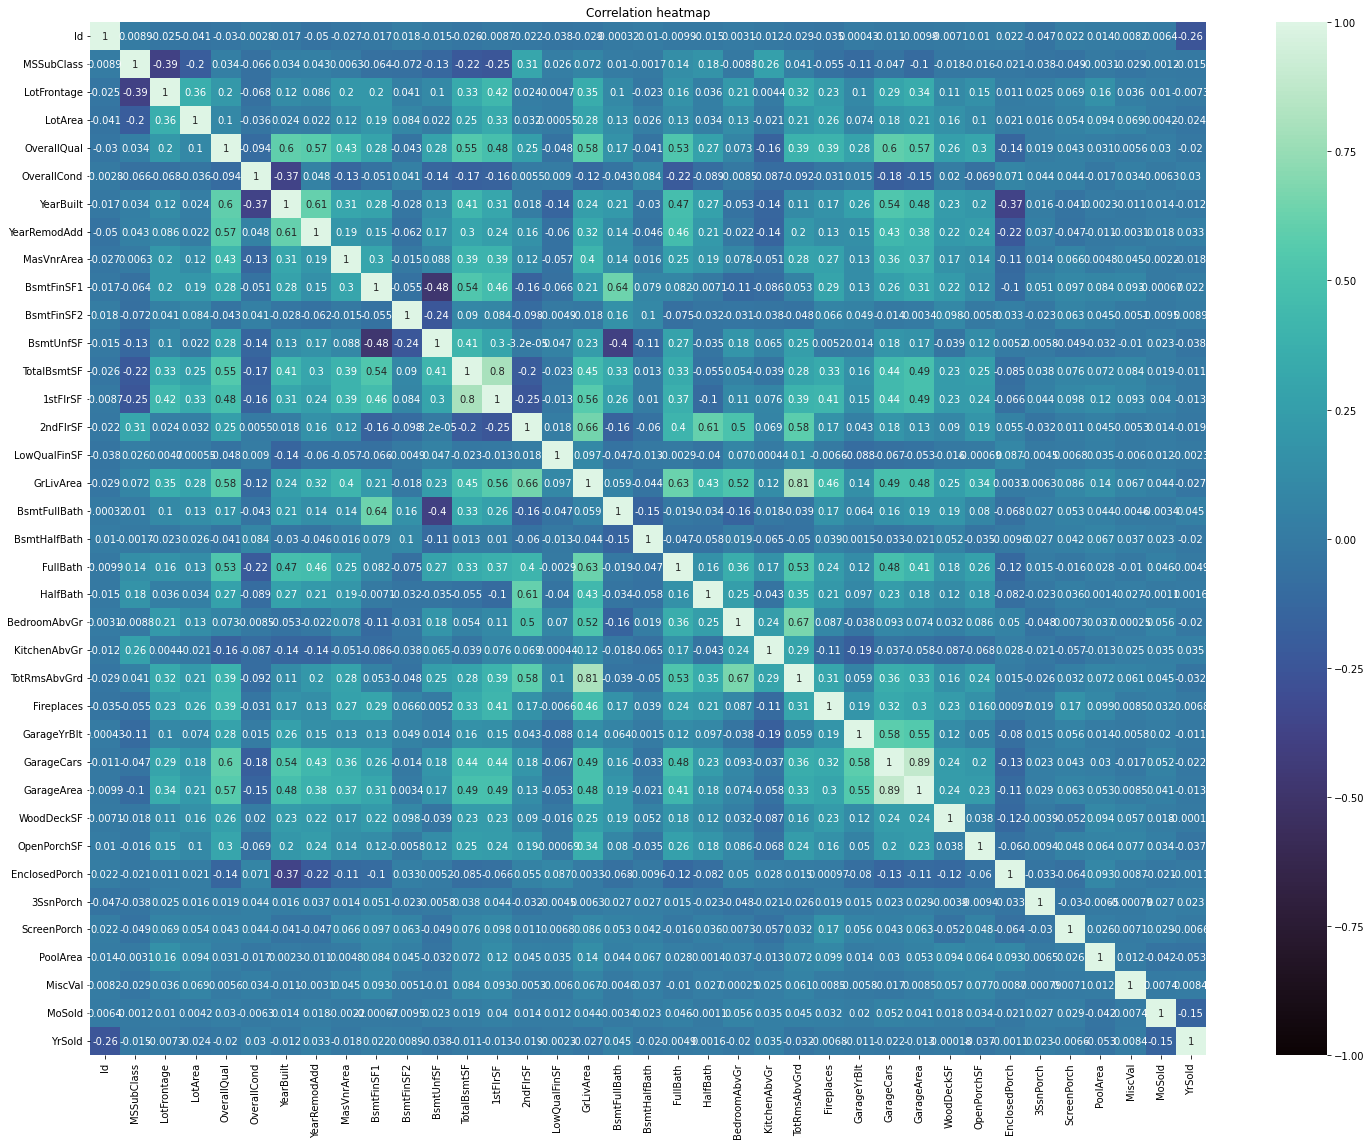

In [27]:
#visualising correaltion between data with a heatmap

plt.figure(figsize=(25,19))
sns.heatmap(corr, annot=True ,vmin=-1.0,cmap='mako')
plt.title('Correlation heatmap')
plt.show()

**As we know all the diagonal elements will be 1 so let's take the upper triangular matrix**


In [28]:
upper_matrix = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,NaN,0.008931,-0.025235,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.026737,-0.017203,...,-0.009851,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050
MSSubClass,NaN,NaN,-0.390118,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.006309,-0.064002,...,-0.103534,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028
LotFrontage,NaN,NaN,NaN,0.364382,0.204190,-0.068350,0.116905,0.085608,0.201090,0.203107,...,0.339380,0.106380,0.152160,0.010541,0.025255,0.069348,0.160857,0.035762,0.010337,-0.007265
LotArea,NaN,NaN,NaN,NaN,0.100541,-0.035617,0.024128,0.021612,0.124728,0.194168,...,0.213180,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234
OverallQual,NaN,NaN,NaN,NaN,NaN,-0.093847,0.597554,0.571532,0.426528,0.282150,...,0.565179,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614
OverallCond,NaN,NaN,NaN,NaN,NaN,NaN,-0.368477,0.047654,-0.133118,-0.050823,...,-0.154312,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.612235,0.307520,0.279780,...,0.481328,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.191668,0.152576,...,0.375892,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301537,...,0.371071,0.166606,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156,-0.002216,-0.017654
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.310219,0.223681,0.124366,-0.099575,0.050934,0.096901,0.084470,0.093310,-0.000671,0.022500


In [29]:
#Dropping columns with high correlation
drop_columns=[col for col in upper_matrix.columns if any(upper_matrix[col]>0.8)]
drop_columns

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [30]:
data.drop(data[drop_columns],axis=1, inplace=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Type
0,1,60,RL,65.0,8450,Pave,Nothing,Reg,Lvl,AllPub,...,0,No,No,No,0,2,2008,WD,Normal,train
1,2,20,RL,80.0,9600,Pave,Nothing,Reg,Lvl,AllPub,...,0,No,No,No,0,5,2007,WD,Normal,train
2,3,60,RL,68.0,11250,Pave,Nothing,IR1,Lvl,AllPub,...,0,No,No,No,0,9,2008,WD,Normal,train
3,4,70,RL,60.0,9550,Pave,Nothing,IR1,Lvl,AllPub,...,0,No,No,No,0,2,2006,WD,Abnorml,train
4,5,60,RL,84.0,14260,Pave,Nothing,IR1,Lvl,AllPub,...,0,No,No,No,0,12,2008,WD,Normal,train


## Label Encoding for categorical variables

In [31]:
from sklearn.preprocessing import LabelEncoder
for i in data_Cat:
    label=LabelEncoder()
    label.fit(data[i].values)
    data[i]=label.transform(data[i].values)

In [32]:
data_Cat=data[data.columns[data.dtypes=='object']]
data_Cat.columns

Index([], dtype='object')

In [33]:
data_Num=data[data.columns[data.dtypes=='int']]
data_Num.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Type

In [34]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Type
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,1
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,1
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,1
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,1
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,1


All the object are of numerical format now.

In [35]:
X_ = data[data.Type==1]
X_ = X_.drop(["Type"], axis=1)

test_ = data[data.Type==0]
test_ = test_.drop(["Type"], axis=1)

In [36]:
X_.shape, y.shape, test_.shape 


((1460, 77), (1460,), (1459, 77))

### Scaling the data

***It is required because dataset has columns which varies highly in magnitudes. If scaling is not performed then high magnitude values will have more impact on modelling.***

In [37]:
from sklearn import preprocessing
names= X_.columns
preprocess = preprocessing.normalize(X_ )
X_scaled = pd.DataFrame(preprocess, columns=names)

In [38]:
X_scaled.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000104,0.006241,0.000312,0.006761,0.878929,0.000104,0.000104,0.000312,0.000312,0.0,...,0.0,0.0,0.000312,0.000416,0.000104,0.0,0.000208,0.208863,0.000832,0.000416
1,0.000189,0.001888,0.000283,0.007552,0.906221,0.000094,0.000094,0.000283,0.000283,0.0,...,0.0,0.0,0.000283,0.000378,0.000094,0.0,0.000472,0.189457,0.000755,0.000378
2,0.000247,0.004934,0.000247,0.005592,0.925187,0.000082,0.000082,0.000000,0.000247,0.0,...,0.0,0.0,0.000247,0.000329,0.000082,0.0,0.000740,0.165136,0.000658,0.000329
3,0.000379,0.006636,0.000284,0.005688,0.905302,0.000095,0.000095,0.000000,0.000284,0.0,...,0.0,0.0,0.000284,0.000379,0.000095,0.0,0.000190,0.190161,0.000758,0.000000
4,0.000332,0.003978,0.000199,0.005569,0.945474,0.000066,0.000066,0.000000,0.000199,0.0,...,0.0,0.0,0.000199,0.000265,0.000066,0.0,0.000796,0.133136,0.000530,0.000265


## Data Visualisation

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


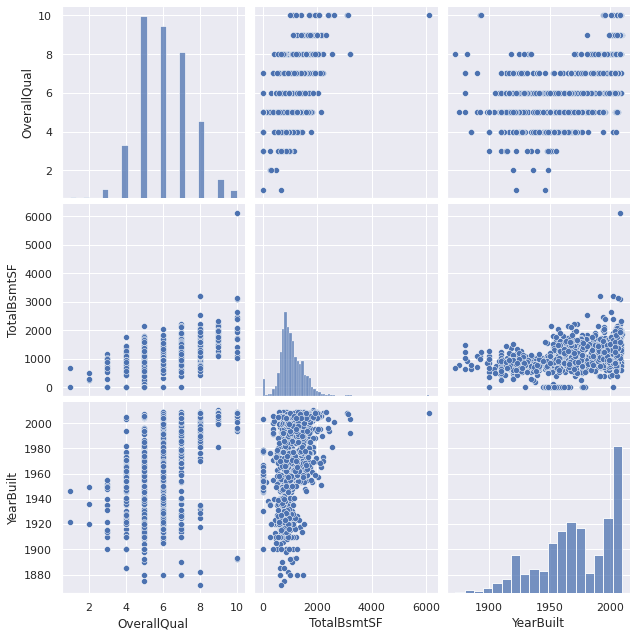

In [39]:
sns.set()
cols = ['OverallQual', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(X_[cols], size = 3)
plt.show()

<AxesSubplot:>

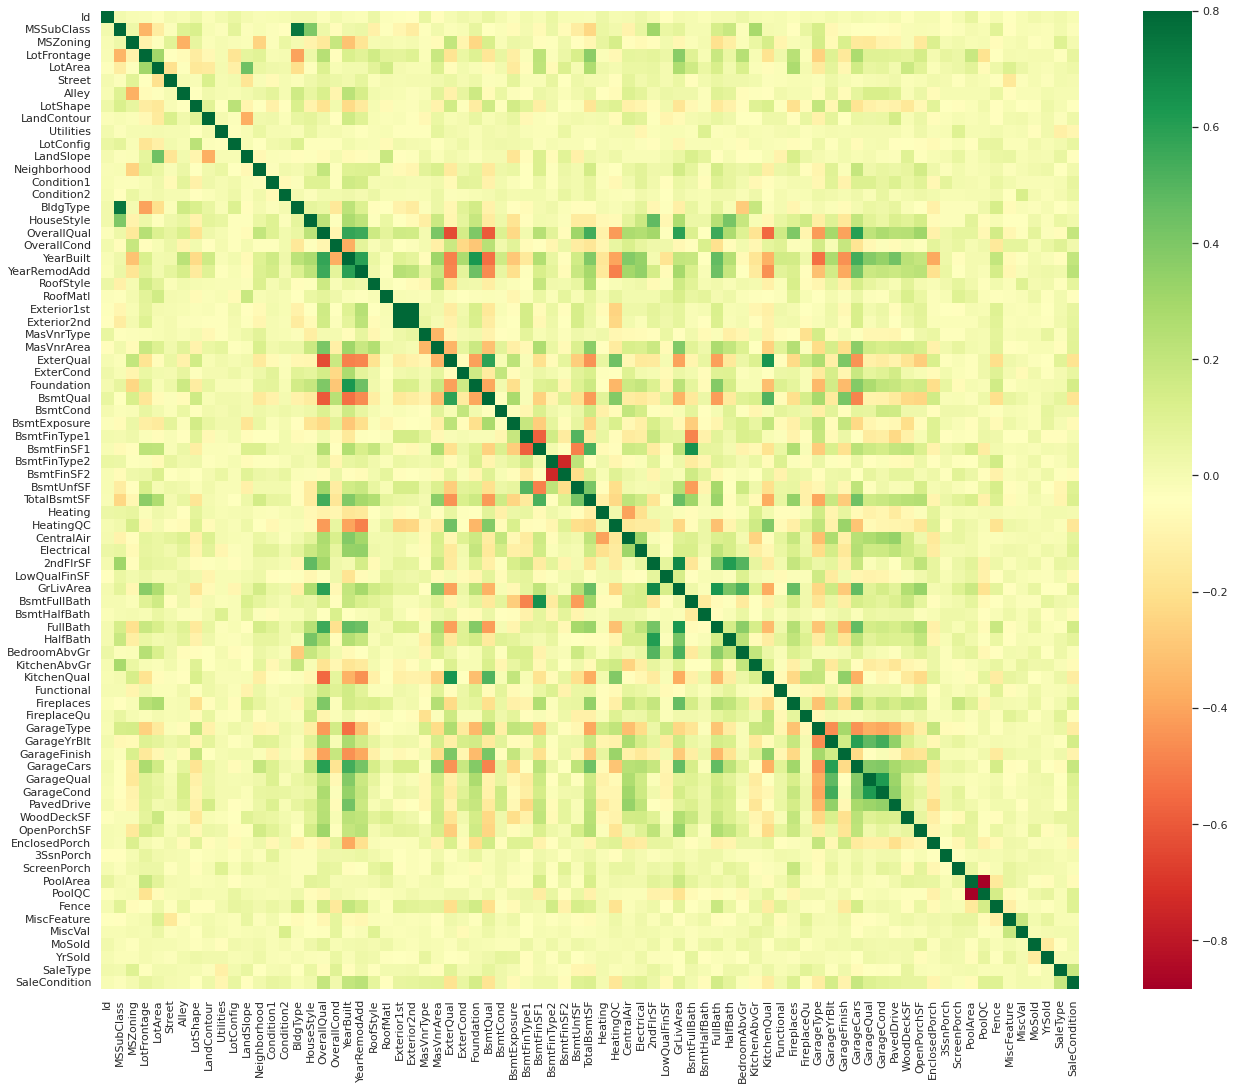

In [40]:
correl=X_.corr()
plt.subplots(figsize=(23,18))
sns.heatmap(correl,vmax=0.8,square=True,cmap="RdYlGn")

## Modelling Aka traning our dataset

In [41]:
#Creating lists to collect all the model names and their scores together

score_test = []
#score_train = []
model = []


In [42]:
from sklearn.model_selection import train_test_split
x_train_90, x_test_10, y_train_90, y_test_10 = train_test_split(X_,y,test_size=0.10,random_state=1)
x_train_75, x_test_25, y_train_75, y_test_25 = train_test_split(X_,y,test_size=0.25,random_state=1)



In [43]:
from sklearn.model_selection import train_test_split
x_train_scaled_90, x_test_scaled_10, y_train_scaled_90, y_test_scaled_10 = train_test_split(X_scaled, y, test_size=0.10, random_state=1)

x_train_scaled_75, x_test_scaled_25, y_train_scaled_75, y_test_scaled_25 = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

model_randomforest_train90 = RandomForestRegressor(n_estimators=500,n_jobs=-1, random_state=13)
model_randomforest_train90.fit(x_train_90, y_train_90)

model_randomforest_train75 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13)
model_randomforest_train75.fit(x_train_75, y_train_75)

model_randomforest_scaled_train90 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13)
model_randomforest_scaled_train90.fit(x_train_scaled_90, y_train_scaled_90)

model_randomforest_scaled_train75 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13)
model_randomforest_scaled_train75.fit(x_train_scaled_75, y_train_scaled_75)


RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13)

In [45]:
score_test.append(model_randomforest_train90.score(x_test_10,y_test_10))
model.append("model_randomforest_train90") 
                  
score_test.append(model_randomforest_train75.score(x_test_25, y_test_25))
model.append("model_randomforest_train75")

score_test.append(model_randomforest_scaled_train90.score(x_test_scaled_10, y_test_scaled_10))
model.append("model_randomforest_scaled_train90")

score_test.append(model_randomforest_scaled_train75.score(x_test_scaled_25, y_test_scaled_25))
model.append("model_randomforest_scaled_train75")

**Xgboost**

In [46]:
import xgboost as xgb
model_xgboost_train90= xgb.XGBRegressor(colsample_bytree=0.4603,gamma=0.0468,
                                       learning_rate=0.05, max_depth=3,
                                       min_child_weight=1.7817, n_estimators=2200,
                                       reg_alpha=0.4640, reg_lambda=0.8571,
                                       subsample=0.5213,silent=1,
                                        random_state=7,nthread= -1)
model_xgboost_train90.fit(x_train_90,y_train_90)

model_xgboost_train75 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
 
model_xgboost_train75.fit(x_train_75, y_train_75)

model_xgboost_scaled_train90 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
 
model_xgboost_scaled_train90.fit(x_train_scaled_90, y_train_scaled_90)

model_xgboost_scaled_train75 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
 
model_xgboost_scaled_train75.fit(x_train_scaled_75, y_train_scaled_75)

[12:19:38] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:19:47] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:19:54] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fl

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603,
             enable_categorical=False, gamma=0.0468, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=4, nthread=-1, num_parallel_tree=1,
             predictor='auto', random_state=7, reg_alpha=0.464,
             reg_lambda=0.8571, scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
score_test.append(model_xgboost_train90.score(x_test_10, y_test_10))
model.append("model_xgboost_train90")

score_test.append(model_xgboost_train75.score(x_test_25, y_test_25))
model.append("model_xgboost_train75")

score_test.append(model_xgboost_scaled_train90.score(x_test_scaled_10, y_test_scaled_10))
model.append("model_xgboost_scaled_train90")

score_test.append(model_xgboost_scaled_train75.score(x_test_scaled_25, y_test_scaled_25))
model.append("model_xgboost_scaled_train75")

**Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeRegressor
model_decisiontree_train90=DecisionTreeRegressor(random_state=0)
model_decisiontree_train90.fit(x_train_90,y_train_90)

model_decisiontree_train75 = DecisionTreeRegressor(random_state=0)
model_decisiontree_train75.fit(x_train_75, y_train_75)

model_decisiontree_scaled_train90 = DecisionTreeRegressor(random_state=0)
model_decisiontree_scaled_train90.fit(x_train_scaled_90, y_train_scaled_90)

model_decisiontree_scaled_train75 = DecisionTreeRegressor(random_state=0)
model_decisiontree_scaled_train75.fit(x_train_scaled_75, y_train_scaled_75)

DecisionTreeRegressor(random_state=0)

In [49]:
score_test.append(model_decisiontree_train90.score(x_test_10, y_test_10))
model.append("model_decisiontree_train90")

score_test.append(model_decisiontree_train75.score(x_test_25, y_test_25))
model.append("model_decisiontree_train75")

score_test.append(model_decisiontree_scaled_train90.score(x_test_10, y_test_10))
model.append("model_decisiontree_scaled_train90")

score_test.append(model_decisiontree_scaled_train75.score(x_test_25, y_test_25))
model.append("model_decisiontree_scaled_train75")

#### LASSO

In [50]:
from sklearn.linear_model import Lasso
model_lasso_train90= Lasso(alpha=0.0005)
model_lasso_train90.fit(x_train_90, y_train_90)

model_lasso_train75 = Lasso(alpha=0.0005)
model_lasso_train75.fit(x_train_75, y_train_75)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60559954098.12744, tolerance: 674901593.7153385
  positive)


Lasso(alpha=0.0005)

In [51]:
score_test.append(model_lasso_train90.score(x_test_10, y_test_10))
model.append("model_lasso_train90")

score_test.append(model_lasso_train90.score(x_test_10, y_test_10))
model.append("model_lasso_train90")

#### Score of all the models

In [52]:
final_scores = pd.DataFrame()
final_scores['model_name'] = model
final_scores['score_test'] = score_test
final_scores

,model_name,score_test
0,model_randomforest_train90,0.939715
1,model_randomforest_train75,0.900585
2,model_randomforest_scaled_train90,0.815658
3,model_randomforest_scaled_train75,0.780236
4,model_xgboost_train90,0.951932
5,model_xgboost_train75,0.912145
6,model_xgboost_scaled_train90,0.841883
7,model_xgboost_scaled_train75,0.876054
8,model_decisiontree_train90,0.848957
9,model_decisiontree_train75,0.770748


#### Finding the best model

In [53]:
best_index=score_test.index(max(score_test))
best_model=final_scores['model_name'][best_index]
best_model

'model_xgboost_train90'

#### Predicting the test data with best model

In [54]:
y_predict_best = model_xgboost_train90.predict(test_)

#### Submission

In [55]:
result = pd.DataFrame()
result['Id'] = test['Id']
result['SalePrice'] = y_predict_best

In [56]:
result.head(10)

,Id,SalePrice
0,1461,123334.320312
1,1462,170089.062500
2,1463,191010.703125
3,1464,199754.453125
4,1465,182465.421875
5,1466,165971.421875
6,1467,175668.500000
7,1468,164446.546875
8,1469,173601.437500
9,1470,129625.273438


In [57]:
result.to_csv('submission.csv', index=False)